In [2]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")
import pandasql as psql

In [3]:
# display all the columns in the dataset
pd.set_option("display.max_columns",None)

In [4]:
#  read the file

bank=pd.read_csv(r"C:\Users\Dlc\Downloads\Universalbank (1).csv",header=0)

# create a backup file

bank2=bank.copy()

In [5]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# check whether there are duplicates or not

bank1=bank[bank.duplicated(keep="first")]
bank1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [7]:
# delete the duplicates if present in the data

bank=bank.drop_duplicates()
bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [8]:
# check whether there are null values or not

bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
# details of the data

bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [10]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [11]:
# count the target or dependent variable by '0' & '1' and their proportion
# (>=10):1 the the data is inbalance data

CreditCard_count=bank.CreditCard.value_counts()
print("class 0",CreditCard_count[0])
print("class 1",CreditCard_count[1])
print("proportion:",round(CreditCard_count[0]/CreditCard_count[1],2),": 1")
print("Total bank records :",len(bank))

class 0 3530
class 1 1470
proportion: 2.4 : 1
Total bank records : 5000


In [12]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
bank.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [14]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [15]:
# identify the variables to normalise with minmax scalar

cols=['Age','Experience','Income','Mortgage','Family','CCAvg','Education']

In [16]:
del bank['ID']
del bank['ZIP Code']

In [17]:
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [18]:
IndepVar=[]
for col in bank.columns:
    if col != 'CreditCard':
        IndepVar.append(col)
TarVar='CreditCard'
x=bank[IndepVar]
y=bank[TarVar]

In [19]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,25,1,49,4,1.6,1,0,0,1,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0


In [20]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Display the shape for train & test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3500, 11), (1500, 11), (3500,), (1500,))

In [77]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0 , 1))

# fit_transform(). It will calculate the mean(μ)and standard deviation(σ) of the feature
#F at a time it will transform the data points of the feature F.
x_train[cols]=mmscaler.fit_transform(x_train[cols])
x_train=pd.DataFrame(x_train)

x_test[cols]=mmscaler.fit_transform(x_test[cols])
x_test=pd.DataFrame(x_test)

# decision tree

In [23]:
# to build decision tree model

from sklearn.tree import DecisionTreeClassifier

#create an object for the dataset 

model=DecisionTreeClassifier()

# train the model with the train dataset

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_prob=model.predict_proba(x_test)

In [24]:
# to display the alorithm hyper parameters

params=model.get_params()
print(params)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [25]:
# confusion matrix in metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual=y_test

# predicted values

predicted=y_pred

# confusion matrix

matrix=confusion_matrix(actual,predicted,labels=[1,0],sample_weight=None,normalize=None)
print("confusion matrix :",matrix)

# outcome values order in sklearn

tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print("outcome values:",tp,fn,fp,tn)

confusion matrix : [[166 279]
 [319 736]]
outcome values: 166 279 319 736


In [27]:
# 'Confusion matrix' and 'classification report' in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Actual values
actual = y_test
# Predicted values
predicted = y_pred
# Confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# Outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Confusion matrix : 
 [[166 279]
 [319 736]]
Outcome values : 
 166 279 319 736


Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.37      0.36       445
           0       0.73      0.70      0.71      1055

    accuracy                           0.60      1500
   macro avg       0.53      0.54      0.53      1500
weighted avg       0.61      0.60      0.61      1500

Accuracy : 60.1 %
Precision : 34.2 %
Recall : 37.3 %
F1 Score : 0.357
Specificity or True Negative Rate : 69.8 %
Balanced Accuracy : 53.6 %
MCC : 0.069
roc_auc_score: 0.535


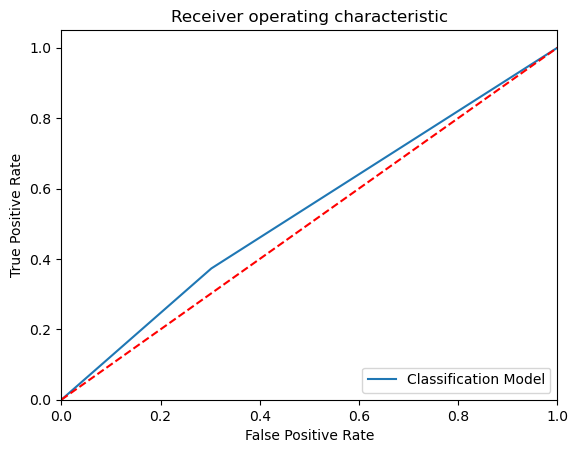

-----------------------------------------------------------------------------------------------------


In [28]:
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, model.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [29]:
Results = pd.DataFrame({'CreditCard_A':y_test, 'CreditCard_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = bank.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CreditCard_A,CreditCard_P
3891,65,40,63,3,0.5,2,0,0,0,0,1,0,0,0
378,47,23,38,2,2.1,3,0,0,0,0,0,0,0,0
3453,29,3,31,4,0.3,2,0,0,0,0,1,0,0,0
569,40,14,70,3,2.1,1,185,0,0,0,0,0,0,0
158,32,6,79,2,1.5,3,0,0,0,0,1,1,1,0


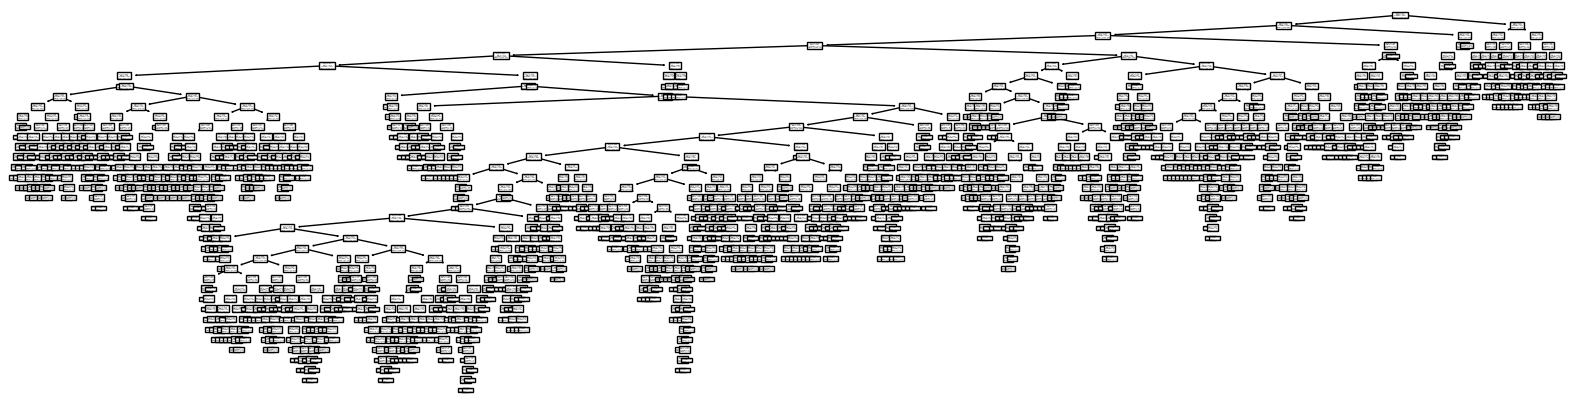

In [32]:
# plot the decision tree

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,5))

tree.plot_tree(model);